# C7M6 Notebook 1: Practice Project - Medical Insurance

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

%matplotlib inline

In [2]:
#task 1: Import the dataset
# loading data
df = pd.read_csv("datasets/medical_insurance.csv", header = None)
header = ["age", "gender", "bmi", "no_of_children", "smoker",  "region", "charges"]
df.columns = header

In [3]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [4]:
df.replace("?", np.nan, inplace = True)

In [5]:
#task2: Data Wrangling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [10]:
is_smoker = df["smoker"].value_counts().idxmax()
df["smoker"] = df["smoker"].replace(np.nan, is_smoker)

mean_age = df["age"].astype(float).mean(axis = 0)
df["age"] = df["age"].replace(np.nan, mean_age)

df[["age", "smoker"]] = df[["age", "smoker"]].astype(float)

df["charges"] = df["charges"].round(2)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   float64
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   float64
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 151.7 KB


In [11]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19.0,1,27.900,0,1.0,3,16884.92
1,18.0,2,33.770,1,0.0,4,1725.55
2,28.0,2,33.000,3,0.0,4,4449.46
3,33.0,2,22.705,0,0.0,1,21984.47
4,32.0,2,28.880,0,0.0,1,3866.86


(0.0, 66902.85800000001)

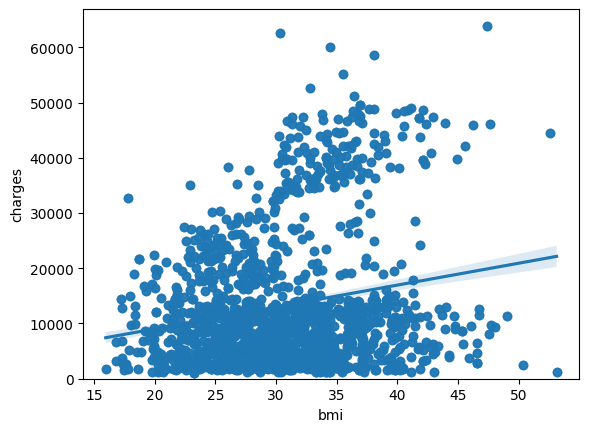

In [16]:
#task3: EDA
sns.regplot(x = "bmi", y = "charges", data = df)
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

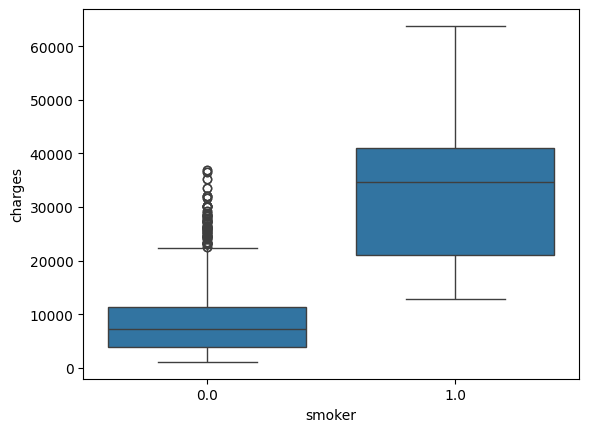

In [17]:
sns.boxplot(x = "smoker", y  = "charges", data = df)

In [18]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026041,0.113045,0.037585,-0.023285,-0.007175,0.298622
gender,-0.026041,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113045,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037585,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023285,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007175,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298622,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


----------------

In [22]:
#task4: model Development
x = df[["smoker"]]
y = df["charges"]

lm = LinearRegression()
lm.fit(x, y)

lm.score(x, y)

0.6221791733924185

In [25]:
x = df.drop("charges", axis = 1)
y = df["charges"]

lm.fit(x,y)

lm.score(x,y)

0.7504063772187107

In [26]:
Input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]

In [28]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [29]:
pipe.fit(x, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [32]:
pipe.score(x, y)

0.8452507048473928

------------------

In [34]:
#task5: Model Refinement
x = df.drop("charges", axis = 1)
y = df["charges"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [37]:
rr = Ridge(alpha = 0.1)
rr.fit(x_train, y_train)
y_hat = rr.predict(x_test)

r2_score(y_test, y_hat)

0.6760802462837341

In [38]:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

rr = Ridge(alpha = 0.1)
rr.fit(x_train_pr, y_train)
y_hat = rr.predict(x_test_pr)

r2_score(y_test, y_hat)

0.7835630578755264

---------------------
Thank You!